# Análise Exploratória dos dados públicos do Consumidor.gov > Reclamações
<hr>

## Importando Pacotes

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import glob

## Importando Dados

In [37]:
all_file_concat = [csv for csv in glob.glob('./data' + f'/*.csv') if 'consumidor_gov_' in csv]

In [38]:
df = pd.concat([pd.read_csv(csv, sep=';', encoding='utf8') for csv in all_file_concat])
print(f'Quantidade de Linhas: {df.shape[0]}\nQuantidade de Colunas: {df.shape[1]}')

Quantidade de Linhas: 513283
Quantidade de Colunas: 19


In [39]:
df.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
0,S,SC,Florianópolis,M,entre 51 a 60 anos,2022-01-19,NaN,Banco BV (antigo Banco Votorantim),"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Financiamentos de Veículos / Leasing,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Loja física,S,N,Finalizada avaliada,Não Resolvida,1.0
1,NE,MA,Timon,M,mais de 70 anos,2022-01-01,NaN,Oi Fixo,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Internet,S,N,Finalizada não avaliada,Não Avaliada,NaN
2,S,RS,Santa Maria,M,entre 21 a 30 anos,2022-01-01,10.0,Vivo - Telefônica,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN
3,NE,BA,Teixeira de Freitas,M,entre 21 a 30 anos,2022-01-01,NaN,Uber,Empresas de Intermediação de Serviços / Negócios,Demais Serviços,Aplicativo de mobilidade urbana,Contrato / Oferta,Dificuldade para contratar o serviço (problema...,Não comprei / contratei,S,N,Finalizada não avaliada,Não Avaliada,NaN
4,SE,RJ,Rio de Janeiro,M,entre 41 a 50 anos,2022-01-04,NaN,Central Nacional Unimed,Operadoras de Planos de Saúde e Administradora...,Saúde,"Plano de Saúde (convênio, autogestão, seguro s...",Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Domicílio,S,N,Finalizada não avaliada,Não Avaliada,NaN


## Análise Exploratória

In [40]:
print(f'Estatística Descritiva:\n{df.describe().T}')

Estatística Descritiva:
                       count      mean       std  min  25%  50%  75%   max
Tempo Resposta      503337.0  6.901936  2.994251  0.0  5.0  8.0  9.0  16.0
Nota do Consumidor  246402.0  2.748415  1.773341  1.0  1.0  2.0  5.0   5.0


In [41]:
print(f'Tipo dos Dados:\n\n{df.dtypes}')

Tipo dos Dados:

Região                     object
UF                         object
Cidade                     object
Sexo                       object
Faixa Etária               object
Data Finalização           object
Tempo Resposta            float64
Nome Fantasia              object
Segmento de Mercado        object
Área                       object
Assunto                    object
Grupo Problema             object
Problema                   object
Como Comprou Contratou     object
Procurou Empresa           object
Respondida                 object
Situação                   object
Avaliação Reclamação       object
Nota do Consumidor        float64
dtype: object


In [42]:
print(f'Linhas vazias: :\n\n{df.isna().sum()}')

Linhas vazias: :

Região                         0
UF                             0
Cidade                         0
Sexo                          51
Faixa Etária                   0
Data Finalização               0
Tempo Resposta              9946
Nome Fantasia                  0
Segmento de Mercado            0
Área                           0
Assunto                        0
Grupo Problema                 0
Problema                       0
Como Comprou Contratou         0
Procurou Empresa               0
Respondida                     0
Situação                       0
Avaliação Reclamação           0
Nota do Consumidor        266881
dtype: int64


### Reclamações por Estado

In [43]:
df.groupby('UF')['UF'].count().nlargest(27)

UF
SP    130288
MG     57114
RJ     50610
PR     45882
BA     28968
RS     26887
DF     24178
SC     22475
GO     17342
CE     14360
PE     13456
ES     11605
MA     10896
MT      9004
PI      7077
PA      6847
PB      5847
MS      5332
AM      5321
RN      4594
TO      3504
AL      3453
SE      3093
RO      2080
AC      1391
RR       900
AP       779
Name: UF, dtype: int64

### Reclamações por Sexo

In [44]:
df.Sexo.value_counts()

M    290544
F    222360
O       328
Name: Sexo, dtype: int64

In [45]:
#df = df[df['Sexo'].str.contains("O")==False]
df = df.query("Sexo == 'M' or Sexo == 'F'")
df.Sexo.value_counts()

M    290544
F    222360
Name: Sexo, dtype: int64

<AxesSubplot:ylabel='Sexo'>

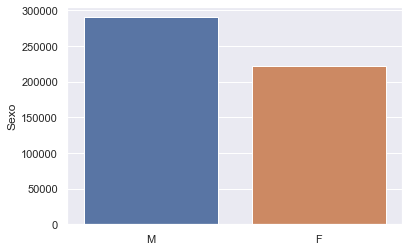

In [46]:
sns.set(style='darkgrid')
sexo = df.Sexo.unique()
cont = df.Sexo.value_counts()
sns.barplot( x=sexo, y=cont)

### Faixa Étaria de Consumidores por Sexo

In [47]:
df.groupby('Sexo')['Faixa Etária'].value_counts()

Sexo  Faixa Etária      
F     entre 31 a 40 anos     67401
      entre 21 a 30 anos     52040
      entre 41 a 50 anos     40447
      entre 51 a 60 anos     27665
      entre 61 a 70 anos     22080
      mais de 70 anos         9321
      até 20 anos             3406
M     entre 31 a 40 anos    104722
      entre 21 a 30 anos     71478
      entre 41 a 50 anos     54073
      entre 51 a 60 anos     27234
      entre 61 a 70 anos     19106
      mais de 70 anos         8810
      até 20 anos             5121
Name: Faixa Etária, dtype: int64

### Consumidores mais jovens contratam serviços pela internet?

<AxesSubplot:ylabel='Faixa Etária,Como Comprou Contratou'>

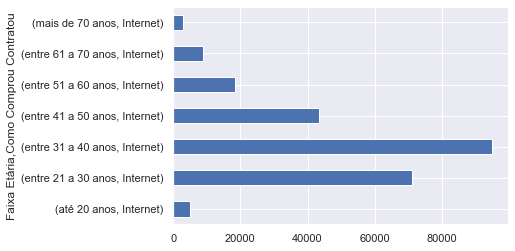

In [48]:
df2 = df.query("`Como Comprou Contratou` == 'Internet'")
df2.groupby(['Faixa Etária'])['Como Comprou Contratou'].value_counts().plot.barh()

### Estes consumidores procuram a empresa antes de registrar uma reclamação?

<AxesSubplot:>

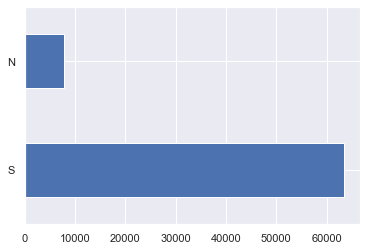

In [49]:
df3 = df2.query("`Faixa Etária` == 'entre 21 a 30 anos'")
df3['Procurou Empresa'].value_counts().plot.barh()

### Problema mais comum

In [50]:
df['Grupo Problema'].value_counts()

Cobrança / Contestação          211317
Contrato / Oferta                98338
Atendimento / SAC                82360
Vício de Qualidade               66888
Dados Pessoais e Privacidade     23158
Entrega do Produto               21725
Informação                        6175
Saúde e Segurança                 2943
Name: Grupo Problema, dtype: int64

In [51]:
df[df['Grupo Problema'] == 'Cobrança / Contestação']['Problema'].value_counts().nlargest(10)

Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores    47977
Cobrança por serviço/produto não contratado / não reconhecido / não solicitado          35824
Cobrança indevida / abusiva para alterar ou cancelar o contrato                         33575
Cobrança de tarifas, taxas, valores não previstos / não informados                      16944
Renegociação / parcelamento de dívida                                                   13369
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado                     8814
Cobrança após cancelamento do serviço                                                    7831
Cálculo de juros, saldo devedor (contestação, solicitação de histórico, dúvidas)         7090
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo        6428
Não envio / atraso do boleto ou fatura / dificuldade com o pagamento                     4927
Name: Problema, dtype: int64

### Reclamações por Segmento de Mercado

In [52]:
df['Segmento de Mercado'].value_counts().nlargest(10)

Bancos, Financeiras e Administradoras de Cartão                            137579
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)     91301
Transporte Aéreo                                                            54903
Comércio Eletrônico                                                         42243
Empresas de Pagamento Eletrônico                                            23033
Viagens, Turismo e Hospedagem                                               21399
Seguros, Capitalização e Previdência                                        18261
Energia Elétrica                                                            16171
Empresas de Intermediação de Serviços / Negócios                            14593
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       14330
Name: Segmento de Mercado, dtype: int64

### Segmentos de Mercado com maior número de reclamação do tipo de problema Cobranca e Constetação

In [53]:
segmento = df[df['Grupo Problema'] == 'Cobrança / Contestação']
segmento['Segmento de Mercado'].value_counts()
#df[df['Grupo Problema'] == 'Cobrança / Contestação']['Segmento de Mercado'].value_counts().nlargest(10)

Bancos, Financeiras e Administradoras de Cartão                            73827
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    44980
Transporte Aéreo                                                           18078
Viagens, Turismo e Hospedagem                                              10923
Empresas de Pagamento Eletrônico                                           10253
Comércio Eletrônico                                                         9404
Energia Elétrica                                                            8148
Seguros, Capitalização e Previdência                                        7471
Empresas de Intermediação de Serviços / Negócios                            5319
Estabelecimentos de Ensino                                                  2664
Agua e Saneamento                                                           2461
Empresas de Recuperação de Crédito                                          2067
Vestuário, Calçados e Acessó

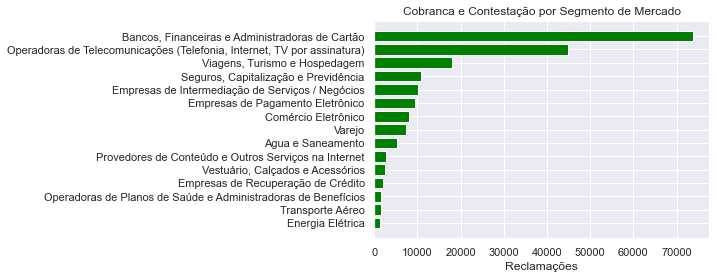

In [54]:
fig, ax = plt.subplots()

y_pos = np.arange(len(segmento['Segmento de Mercado'].value_counts()[:15]))
values = segmento['Segmento de Mercado'].value_counts()[:15]
segmentos = segmento['Segmento de Mercado'].unique()[:15]

ax.barh(y_pos, values, align='center', color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamações')
ax.set_title('Cobranca e Contestação por Segmento de Mercado')
plt.show()

### Rank das Top 15 Empresas por Reclamações

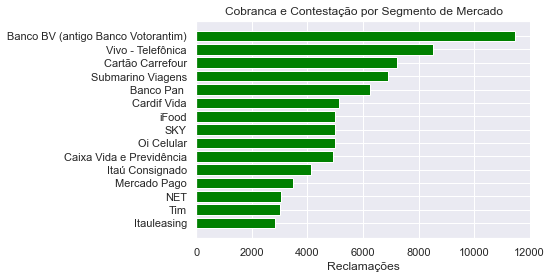

In [55]:
fig, ax = plt.subplots()

y_pos = np.arange(len(segmento['Nome Fantasia'].value_counts()[:15]))
values = segmento['Nome Fantasia'].value_counts()[:15]
segmentos = segmento['Nome Fantasia'].unique()[:15]

ax.barh(y_pos, values, align='center', color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamações')
ax.set_title('Cobranca e Contestação por Segmento de Mercado')
plt.show()

## Tempo de resposta tem alguma correlação com a nota do consumidor?

In [56]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Tempo Resposta,Nota do Consumidor
Tempo Resposta,1.000000,-0.054509
Nota do Consumidor,-0.054509,1.000000


<AxesSubplot:ylabel='Density'>

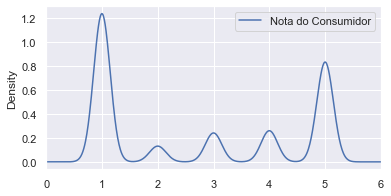

In [57]:
df.plot.density(y='Nota do Consumidor', xlim=[0,6], figsize=[6,3])

<AxesSubplot:ylabel='Density'>

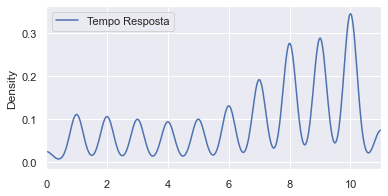

In [58]:
df.plot.density(y='Tempo Resposta', xlim=[0,11], figsize=[6,3])

## Distribuição do prazo médio de respostas

In [59]:
df_3 = df[df['Tempo Resposta'] == 10.0]
df_3['Grupo Problema'].value_counts()

Cobrança / Contestação          39886
Contrato / Oferta               17737
Atendimento / SAC               14941
Vício de Qualidade              12609
Entrega do Produto               4195
Dados Pessoais e Privacidade     3694
Informação                        840
Saúde e Segurança                 454
Name: Grupo Problema, dtype: int64

## Proporção de reclamações registradas e não respondidas/resolvida

In [134]:
df['Avaliação Reclamação'].unique()

array(['Não Resolvida'], dtype=object)

In [122]:
totalReclamacoes = df.groupby('Segmento de Mercado')['Segmento de Mercado'].count()
totalReclamacoes = totalReclamacoes[totalReclamacoes > 400]
totalReclamacoes.nlargest(10)

Segmento de Mercado
Bancos, Financeiras e Administradoras de Cartão                            29021
Transporte Aéreo                                                           15328
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    13226
Comércio Eletrônico                                                        10075
Viagens, Turismo e Hospedagem                                               7475
Empresas de Pagamento Eletrônico                                            6050
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       5302
Energia Elétrica                                                            4549
Empresas de Intermediação de Serviços / Negócios                            3984
Seguros, Capitalização e Previdência                                        3650
Name: Segmento de Mercado, dtype: int64

In [123]:
totalReclamacoesNaoResolvidas = df.query('`Avaliação Reclamação` == "Não Resolvida"')
totalReclamacoesNaoResolvidas = totalReclamacoesNaoResolvidas['Segmento de Mercado'].value_counts()
totalReclamacoesNaoResolvidas.nlargest(10)

Bancos, Financeiras e Administradoras de Cartão                            29021
Transporte Aéreo                                                           15328
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    13226
Comércio Eletrônico                                                        10075
Viagens, Turismo e Hospedagem                                               7475
Empresas de Pagamento Eletrônico                                            6050
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       5302
Energia Elétrica                                                            4549
Empresas de Intermediação de Serviços / Negócios                            3984
Seguros, Capitalização e Previdência                                        3650
Name: Segmento de Mercado, dtype: int64

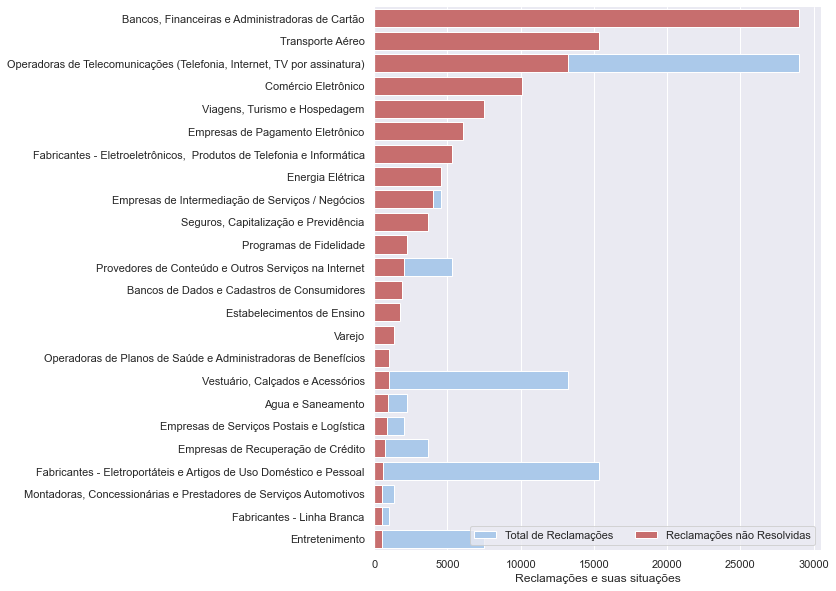

In [124]:
f, ax = plt.subplots(figsize=(8,10))

sns.set_color_codes('pastel')
sns.barplot(x=totalReclamacoes.values, y=totalReclamacoes.keys(), label='Total de Reclamações', color='b')

sns.set_color_codes('muted')
sns.barplot(x=totalReclamacoesNaoResolvidas.values, y=totalReclamacoesNaoResolvidas.keys(), label='Reclamações não Resolvidas', color='r')

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(ylabel='', xlabel='Reclamações e suas situações')
sns.despine(left=False, bottom=True)